### 분류
#### 훈련데이터를 이용해서 target데이터를 맞추는 과정
####  target데이터가 범주형 데이터일때 분류 진행
#### KNN : 종속변수에 속한 갯수의 비율로 결정됨

### 회귀
#### 훈련데이터를 이용해서 target데이터를 예측하는 과정
####  target데이터가 연속형 데이터일때 회귀 진행
####  회귀는 정해진 범주가 없으며 임의의 수치값을 출력(예측)함
#### KNN : 이웃한 값들의 평균값을 예측값으로 출력

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 데이터 준비하기(농어의 길이와 무게)

In [6]:
# 농어 길이(독립변수 input_data)와 무게(종속변수 target_data)
perch_length= np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [9]:
perch_length.shape, perch_weight.shape

((56,), (56,))

#### 데이터간의 선형선(상관)을 갖는지 확인(스캐터 차트)

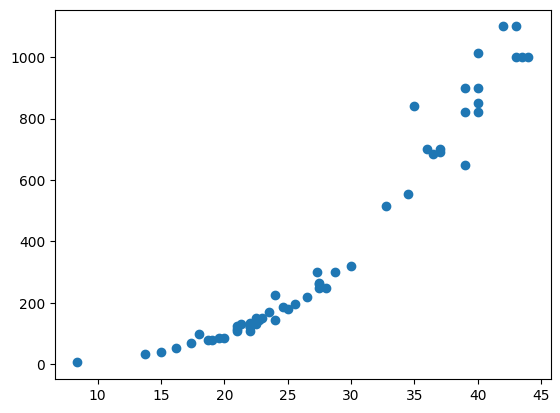

In [24]:

plt.scatter(x = perch_length, y = perch_weight)
plt.show()
# 길이가 길어지면서 무게도 커지는 현상
# 좌하향은 곡선을 나태고 있으며
# 중간이후 우상향으로 갈수록 직선을 나타내고 있음
# 전체적으로 직선이 아닌 곡선을 나타내고 있다고 볼수 있음
# 넝어의 길이의 값이 커질수록 무게고 커지는 우상향 곡선을

### 직선의 형태로 가장하고 훈련시키기
#### 훈련 데이터셋과 테스트 데이터셋으로 나누기

In [50]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.25, random_state=
                                                                     42)

In [51]:
train_input.shape, train_target.shape, test_input.shape, test_target.shape

((42,), (42,), (14,), (14,))

### 훈련을 위해 독립변수(1차원)는 2차원(reshape(행,열)) 변환이 필요

In [54]:
test_array = np.array([1,2,3,4])
test_array.shape

(4,)

In [55]:
# 1차원 데이터를 2차원 데이터로 변형(reshape(행,열))
test_array2 = test_array.reshape(-1,1) # 전체행, 1열
test_array2.shape  # 4행 1열

(4, 1)

In [57]:
# 훈련을 하고자 할 때 사용하는 독립변수의 1차원인 경우 2차원으로 변환 필요
#  train_input, test_input
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

### 훈련데이터 학습시키기

In [59]:
# 훈련에 사용하는 회귀모델 : KNeighborsRegressor()
from sklearn.neighbors import KNeighborsRegressor as knn

In [62]:
# 모델 생성 및 학습
knr = knn()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [74]:
# 훈련평가하기 : 테스트 데이타 사용
knr.score(test_input, test_target)

0.992809406101064

### 회귀에서 평가결과 : 결정계수(R2) 또는 설명력이라고 칭함
##### 분류에서는 정확도라는 용어를 사용
##### 회귀에서는 결정계수라는 용어를 사용
##### 정확한 예측값이 아닌 임의 수치값(예측)으로 나오게 됨

### 결정계수 값의 범위
#### 0~1사이의 값으로 출력됨
#### 1에 가까울 수록 학습력이 좋은 모델이라고 함
#### 이때 학습능력(예측)을 설명력이라고 함

### 결정계수 공식 : 1 - ((타겟 - 예측)^2의 합 / (타겟 - 타깃평균)^2의 합)
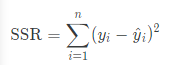 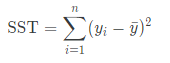 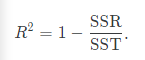 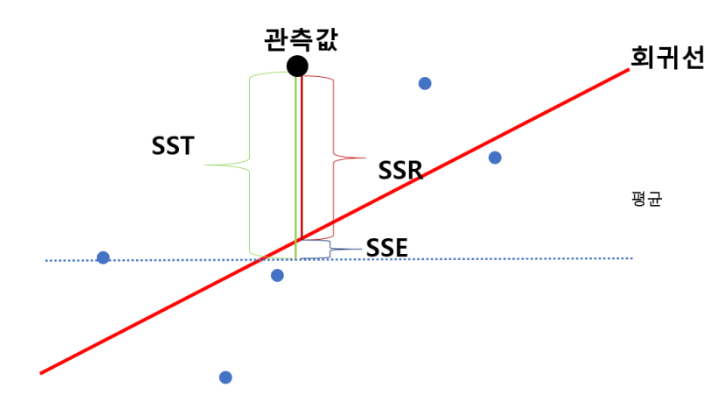
#### 예측값이 타겟값이 가까울수록 분자값이 0에 수렴되기에 결정계수의 값음 1에 가까워 짐

### 오차율 확인
#### mae(평균 절대값 오차) 해석하기
#### 예측값이 평균적으로 19.157g 정도 타겟값과 오차가 있다고 해석
#### 따라서 KNN회귀모델의 결과 19.157g 오차를 보임

In [75]:
from sklearn.metrics import mean_absolute_error as mae

In [76]:
# test_input데이터를 이용해서 예측하기
k_pred = knr.predict(test_input)

In [80]:
# 평균 절대값 오차 확인
# - 예측값이 평균적으로 19.157g 정도 타겟값과 오차가 있다고 해석
# - 따라서 KNN회귀모델의 결과 19.157g 오차를 보임

rslt = mae(test_target,k_pred)
rslt

19.157142857142862

### 어떤 오차율이 있는지 확인(과적합 여부 확인) - score(스코어)의 결과로 확인
#### 과대적합과 과소적합으로 구분

#### 과대적합 : 훈련데이터 평가결과가 너무 높고 테스트 데이터 평가결과가 너무 낮게 나오는 경우
#### 과소적합 : 훈련데이터 평가결과가 테스트 평가결과보가 낮게 나오는 경우

### 과소적합이 일어난 경우
#### - 사용된 전체 데이터셋의 갯수가 작은 경우 주로 발생
#### - 데이터가 작으면 테스특사 훈련의 특징을 잘 따르지 못하는 경우 발생
#### - 과소적합을 해소하기 위한 방법 : 하이퍼파라미터 튜닝 진행


In [83]:
# 과소적합이 일어난 경우
# - 사용된 전체 데이터셋의 갯수가 작은 경우 주로 발생
# - 데이터가 작으면 테스특사 훈련의 특징을 잘 따르지 못하는 경우 발생
#- 과소적합를 해소하기 위한 방법 : 하이퍼파라미터 튜닝 진행
test_score = knr.score(test_input, test_target)
train_score = knr.score(train_input, train_target)
train_score, test_score

(0.9698823289099254, 0.992809406101064)

### 과적합 여부 확인
#### - 훈련데이터 스코어와 테스트데이터 스코어를 비교
#### - 훈련 평가결과가 테스트 평가결과보다 낮세 나왔기 때문에 '과소적합'으로 판단
#### - 훈련모델로 사용하기에 부적합하므로 원인분석후 하이퍼파라미터 튜닝

In [84]:
# 과소적합이 발생한 경우
# - 데이터 양이 적은 경우
# - 데이터양을 조정할 수 없다면 복잡도를 조정



### 모델을 복잡하게 만드는 방법
#### - 이웃의 개수를 작게 한다
#### - 이웃의 개수가 작아지면 이웃의 비교대상이 조금 더 압축되기 때문에 평가결과가 높아질수 있음

### 이웃의 개수를 낮추는 방법
#### - 이웃의 개수 기본값 5를 사용해서 훈련 진행
#### - 이웃의 개수를 낮추면서 평가결과를 확인
#### - 평가결과 가장 좋은 시점의 이웃의 개수를 선정
#### - 평가결과에 따른 이웃으 ㅣ개수는 훈련과 테스트를 비교하여 결정하게 됨

In [107]:
for i in range(5,2,-1):
    knr = knn(n_neighbors = i)
    knr.fit(train_input,train_target)
    print('{} : {}'.format(i,knr.score(train_input,train_target)))
    print('{} : {}'.format(i,knr.score(test_input,test_target)))
    print()

5 : 0.9698823289099254
5 : 0.992809406101064

4 : 0.978211389719245
4 : 0.9840231023848637

3 : 0.9804899950518966
3 : 0.9746459963987609



### hyper parameter
#### - 사람이 직접 결정해 주어야 하는 변수들의 값을 의미함
#### - 보통 모델(클래스) 생성시 인자로 넣어주는 변수들을 의미함
#### - 일반적으로 각모델(클래스)에서 사용되는 디폴트 값을 최적화 된 값으로 봄
#### - 최초 모델(클래스) 생성시에는 디폴트로 사용하고 과적합의 문제가 발생할 경우에 튜닝으로 진행

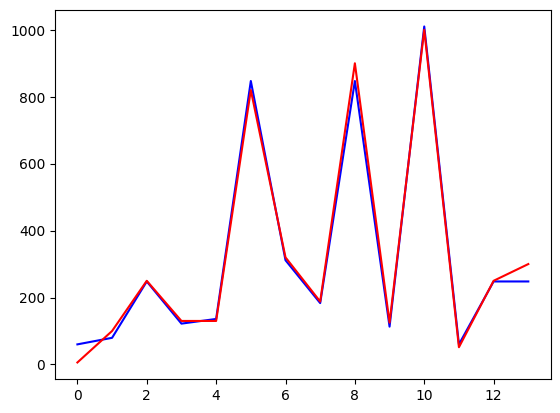

In [71]:
plt.plot(k_pred, color='blue')
plt.plot(test_target, color='red')
plt.show()

In [22]:
col = ['perch_length','perch_weight']
dd = pd.DataFrame(perch_length,perch_weight).reset_index()
dd.columns = col
dd.head(2)

,perch_length,perch_weight
0,5.9,8.4
1,32.0,13.7


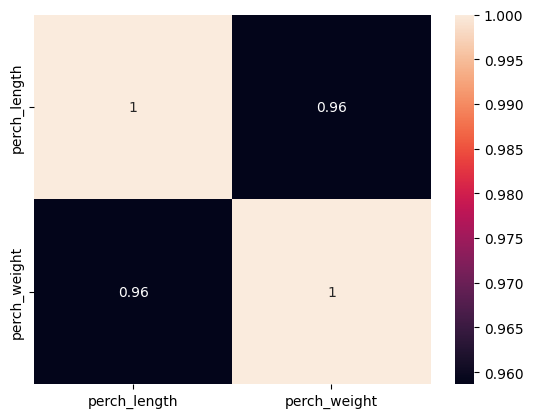

In [21]:
import seaborn as sns
sns.heatmap(dd.corr(),annot=True)
plt.show()